In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten 
from keras.layers import Dense 
from keras.preprocessing.image import ImageDataGenerator
import numpy as np  

In [ ]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory='/content/drive/MyDrive/Colab Notebooks/vgg16/dataset/training_set',target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory='/content/drive/MyDrive/Colab Notebooks/vgg16/dataset/test_set',target_size=(224,224))

Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
VGG = keras.applications.vgg16.VGG16(input_shape=(224,224,3),include_top=False, weights='imagenet')
VGG.trainable = False 
model = keras.Sequential([
                           VGG,
                           keras.layers.Flatten(),
                           keras.layers.Dense(units=256,activation="relu"),
                           keras.layers.Dense(units=256,activation="relu"),
                           keras.layers.Dense(units=2,activation="softmax")
])
model.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [ ]:
model.summary()
hist = model.fit_generator(steps_per_epoch=100,generator = traindata, validation_data=testdata, validation_steps=10,epochs=5)
model.save('vggclf.h5')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_6 (Dense)             (None, 256)               6422784   
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 dense_8 (Dense)             (None, 2)                 514       
                                                                 
Total params: 21,203,778
Trainable params: 6,489,090
Non-trainable params: 14,714,688
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/5
100/100 [==============================] - 1580s 16s/step - loss: 3.0486 - accuracy: 0.9162 - val_loss: 2.3219 - val_accuracy: 0.9125
Epoch 2/5
100/100 [==============================] - 1635s 16s/step - loss: 0.5767 - accuracy: 0.9628 - val_loss: 0.6136 - val_accuracy: 0.9563
Epoch 3/5
100/100 [==============================] - 1565s 16s/step - loss: 0.2669 - accuracy: 0.9781 - val_loss: 0.6351 - val_accuracy: 0.9531
Epoch 4/5
100/100 [==============================] - 1561s 16s/step - loss: 0.1330 - accuracy: 0.9872 - val_loss: 0.4418 - val_accuracy: 0.9750
Epoch 5/5
100/100 [==============================] - 1558s 16s/step - loss: 0.1324 - accuracy: 0.9900 - val_loss: 1.2539 - val_accuracy: 0.9563


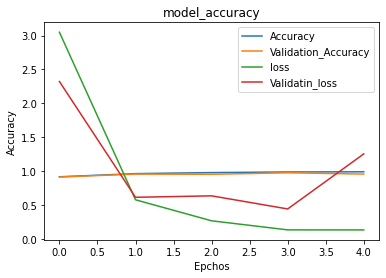

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model_accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epchos")
plt.legend(["Accuracy","Validation_Accuracy","loss","Validatin_loss"])
plt.show()

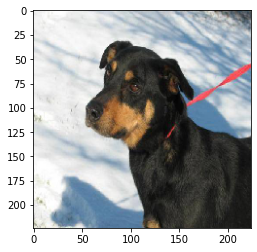

In [ ]:
from keras.preprocessing import image
img = image.load_img("/content/drive/MyDrive/Colab Notebooks/vgg16/dataset/test_set/imported/dog.5000.jpg",target_size = (224,224))
img = np.asarray(img)
plt.imshow(img)
img=np.expand_dims(img, axis=0)

In [ ]:
from keras.models import load_model
saved_model = load_model("vggclf.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
  print("CAT")
else:
  print("DOG")

DOG
